In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import tools
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import dataset urdu dataset
data = pd.read_excel('dataset_news_Fake.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.No    552 non-null    int64 
 1   Review  552 non-null    object
 2   Class   552 non-null    object
dtypes: int64(1), object(2)
memory usage: 13.1+ KB


In [ ]:
#apple
data['Class'].value_counts()

Fake      328
Satire    224
Name: Class, dtype: int64

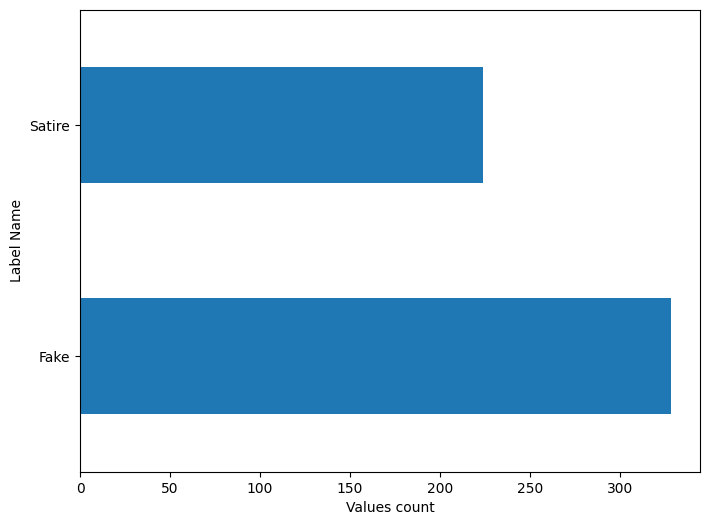

In [ ]:
# multiple line plot
# data.label_name.value_counts()
fig, ax = plt.subplots(figsize=(8,6))
#plt.rcParams['axes.labelweight'] = 'bold'
data['Class'].value_counts().plot(kind = 'barh',ax=ax)
plt.xlabel('Values count')
plt.ylabel('Label Name')
#plt.savefig('nationality1.pdf')
plt.show()

In [ ]:
# df_=df_.dropna()
data.isnull().sum()

S.No      0
Review    0
Class     0
dtype: int64

In [ ]:
# Find duplicates based on all columns
duplicates = data.duplicated()

# Print the rows that are duplicates
print(data[duplicates])

Empty DataFrame
Columns: [S.No, Review, Class]
Index: []


# Remove the inconsistencies from english text

In [ ]:
!pip install nltk
!pip install emoji
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
import emoji

def clean_eng_text(Review):
    # Removal of hashtags, HTML tags, mentions, punctuations, and URLs
    Review = re.sub(r'#\w+', '', Review)             # Remove hashtags
    Review = re.sub(r'<.*?>', '', Review)            # Remove HTML tags
    Review = re.sub(r'@[A-Za-z0-9_]+', '', Review)   # Remove mentions
    Review = re.sub(r'[^\w\s]', '', Review)          # Remove punctuations
    Review = re.sub(r'http\S+', '', Review)          # Remove URLs
    Review = re.sub(r'(.)\1+', r'\1', Review)        # Remove repeating characters

    # Changing to lowercase
    Review = Review.lower()

    # Replace emoji with corresponding text representation
    Review = emoji.demojize(Review)

    return Review

data['Review'] = data['Review'].apply(lambda x: clean_eng_text(x))
data['Review'].head(10)


0     new document reveals lynch instructed comey t...
1     chris christie womens viagra pil wil only inc...
2     roger stone blames obama for the posibility o...
3     bil oreily companies under trump must say mer...
4     today trump authorizes congres to pursue crim...
5     npr 25 milion votes for clinton completely fa...
6     confirmed mueler team can be disbared for cli...
7     because trump won the presidency ford shifts ...
8     denzel washington backs trump in the most epi...
9     trump makes huge anouncement about southern w...
Name: Review, dtype: object

In [ ]:
# Mapping of abbreviations and their full forms
abbreviation_mapping = {
    'thnx': 'thanks',
    'thx': 'thanks',
    'btw': 'by the way',
    'pls': 'please',
    'plz': 'please',
    'idk': 'I don\'t know',
    'omg': 'oh my god',
    'wtf': 'what the f',
    'lol': 'laugh out loud',
    'omw': 'on my way',
    'brb': 'be right back',
    'gtg': 'got to go',
    'afaik': 'as far as I know',
    'btwn': 'between',
    'ftw': 'for the win',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'tbh': 'to be honest',
    'omg': 'oh my god',
    'rn': 'right now',
    # Add more abbreviations and their full forms as needed
}

# Function to replace abbreviations with their full forms
def replace_abbreviations(Review):
    if Review is not None and isinstance(Review, str):
        words = Review.split()
        replaced_words = [abbreviation_mapping.get(word.lower(), word) for word in words]
        return ' '.join(replaced_words)
    else:
        return ""

# Apply abbreviation replacement to 'text' column
data['Review'] = data['Review'].apply(replace_abbreviations)
data['Review'].head(5)

0    new document reveals lynch instructed comey to...
1    chris christie womens viagra pil wil only incr...
2    roger stone blames obama for the posibility of...
3    bil oreily companies under trump must say mery...
4    today trump authorizes congres to pursue crimi...
Name: Review, dtype: object

In [ ]:
# Remove the numeric values from the dataset
data['Review'] = data['Review'].str.replace(r'\d+', '', regex=True)
data['Review'].head(2)

0    new document reveals lynch instructed comey to...
1    chris christie womens viagra pil wil only incr...
Name: Review, dtype: object

In [ ]:
# 1. Tokenization

from nltk.tokenize import word_tokenize

data['Tokenized_Review'] = data['Review'].apply(word_tokenize)

data['Tokenized_Review'].head(2)

0    [new, document, reveals, lynch, instructed, co...
1    [chris, christie, womens, viagra, pil, wil, on...
Name: Tokenized_Review, dtype: object

In [ ]:
# 2. Stop Word Removal
import nltk
from nltk.corpus import stopwords

# Ensure you've downloaded the stopwords dataset from NLTK
# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

data['StopWordRemoval_Review'] = data['Tokenized_Review'].apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])
data['StopWordRemoval_Review'].head(2)


0    [new, document, reveals, lynch, instructed, co...
1    [chris, christie, womens, viagra, pil, wil, in...
Name: StopWordRemoval_Review, dtype: object

In [ ]:
# 3. Lemmatization
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

data['Review'] = data['StopWordRemoval_Review'].apply(lambda tokens: ' '.join([lemmatizer.lemmatize(token) for token in tokens]))
data['Review'].head(2)

0    new document reveals lynch instructed comey co...
1    chris christie woman viagra pil wil increase l...
Name: Review, dtype: object

# UNi-gram tf-idf

In [ ]:
# save the text in X
X=data['Review']
X.head(2)

0    new document reveals lynch instructed comey co...
1    chris christie woman viagra pil wil increase l...
Name: Review, dtype: object

In [ ]:
data['Class'].value_counts()

Fake      328
Satire    224
Name: Class, dtype: int64

In [ ]:
# convert the target class into numeric
data['Class'] = data['Class'].map({'Satire': 0, 'Fake': 1})
data['Class']

0      1
1      1
2      1
3      1
4      1
      ..
547    0
548    0
549    0
550    0
551    0
Name: Class, Length: 552, dtype: int64

In [ ]:
# count the values
data['Class'].value_counts()

1    328
0    224
Name: Class, dtype: int64

In [ ]:
y=data['Class']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [ ]:
# Train Test Split
# Set the random seed for reproducibility
random_seed = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

In [ ]:
#n-gram
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1))
# Vectorize the training data
X_train = vectorizer.fit_transform(X_train)
# Vectorize the test data
X_test = vectorizer.transform(X_test)

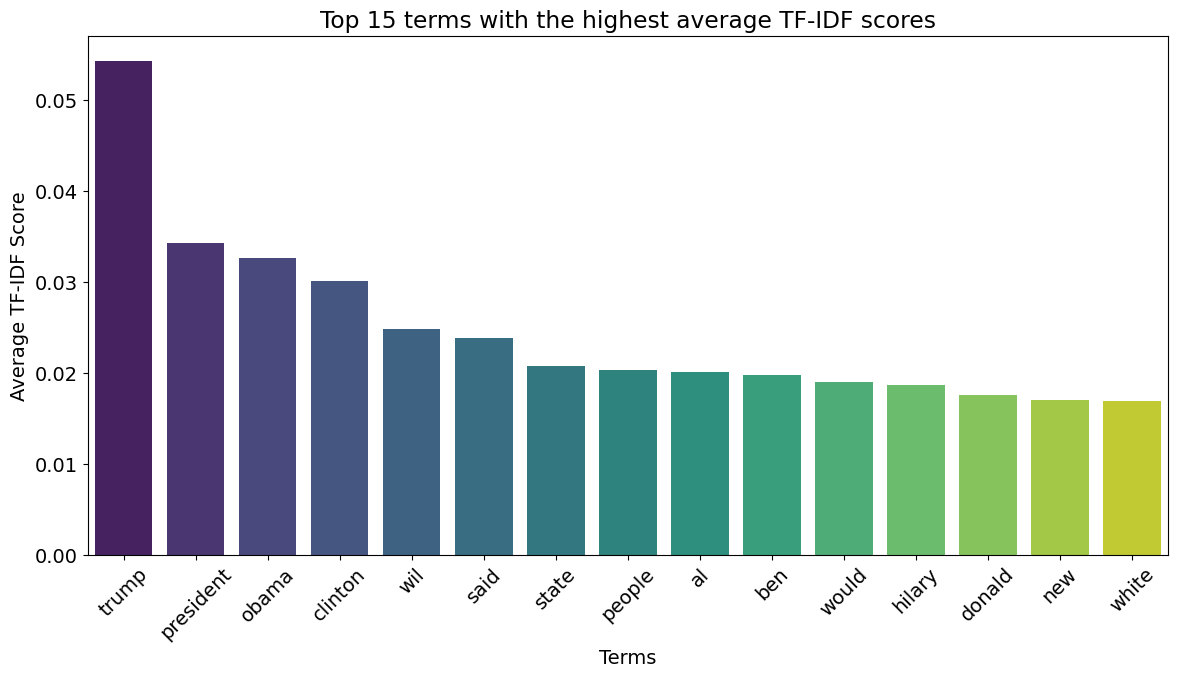

Total number of features generated:  12397


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set font and font size globally
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14

# Calculate the mean TF-IDF score for each term
mean_tfidf_scores = np.mean(X_train, axis=0).tolist()[0]

# Pair the scores with their corresponding terms
terms_scores = list(zip(vectorizer.get_feature_names_out(), mean_tfidf_scores))

# Sort by score in descending order
sorted_terms_scores = sorted(terms_scores, key=lambda x: x[1], reverse=True)

# Get top N terms
N = 15
top_terms = sorted_terms_scores[:N]

terms, scores = zip(*top_terms)

# Create the colorful bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=list(terms), y=list(scores), palette="viridis")
plt.title('Top {} terms with the highest average TF-IDF scores'.format(N))
plt.xlabel('Terms')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the total number of features generated
total_features = len(vectorizer.get_feature_names_out())
print("Total number of features generated: ", total_features)

### Random Forest

In [ ]:
# n-gram
# Set the random seed for reproducibility
from sklearn.metrics import roc_auc_score

random_seed = 42
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
print("Random FOrest Result")
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=10,random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
print("RFC")
print(classification_report(y_test,pred,digits=4))

# Calculate AUC
auc = roc_auc_score(y_test, pred)
# Print AUC
print("AUC: {:.4f}".format(auc))


# apply the logistic regression
from sklearn.linear_model import LogisticRegression
random_seed = 42
lr=LogisticRegression(penalty ='l1',C=5.0,random_state= 52, solver='liblinear', max_iter=400)
print("Logistic Regression Result")
logisticRegresion=lr.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,logisticRegresion,digits=4))

# Calculate AUC
auc = roc_auc_score(y_test, logisticRegresion)
# Print AUC
print("AUC: {:.4f}".format(auc))

# Create an AdaBoost classifier

from sklearn.ensemble import AdaBoostClassifier
random_seed = 42
ada = AdaBoostClassifier(n_estimators=400, learning_rate=1.5, algorithm='SAMME.R', random_state=52)
print("AdaBoost Result")
AdaBoost=ada.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,AdaBoost,digits=4))

# Calculate AUC
auc = roc_auc_score(y_test, AdaBoost)
# Print AUC
print("AUC: {:.4f}".format(auc))

Random FOrest Result
RFC
              precision    recall  f1-score   support

           0     0.7407    0.2985    0.4255        67
           1     0.6619    0.9293    0.7731        99

    accuracy                         0.6747       166
   macro avg     0.7013    0.6139    0.5993       166
weighted avg     0.6937    0.6747    0.6328       166

AUC: 0.6139
Logistic Regression Result
              precision    recall  f1-score   support

           0     0.6949    0.6119    0.6508        67
           1     0.7570    0.8182    0.7864        99

    accuracy                         0.7349       166
   macro avg     0.7260    0.7151    0.7186       166
weighted avg     0.7319    0.7349    0.7317       166

AUC: 0.7151
AdaBoost Result
              precision    recall  f1-score   support

           0     0.5938    0.5672    0.5802        67
           1     0.7157    0.7374    0.7264        99

    accuracy                         0.6687       166
   macro avg     0.6547    0.6523   

# Apply Deep learning models with TF-IDF

In [ ]:
# Train Test Split
# Set the random seed for reproducibility
random_seed = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

from sklearn.feature_extraction.text import TfidfVectorizer
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 1))

# Vectorize the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Vectorize the test data
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
print("X_train_tfidf dimensions:", X_train_tfidf.shape)
print("X_test_tfidf dimensions:", X_test_tfidf.shape)

X_train_tfidf dimensions: (386, 12397)
X_test_tfidf dimensions: (166, 12397)


### Apply the DNN

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Assume X_train_tfidf, X_test_tfidf, y_train, and y_test are already defined

# Reshape the TF-IDF matrices
X_train_reshaped = X_train_tfidf.toarray()
X_test_reshaped = X_test_tfidf.toarray()

# Build DNN model
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Dropout(0.9))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=10, batch_size=30)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test_reshaped)

# Round predictions to convert probabilities to binary values
y_pred_binary = (predictions > 0.5).astype(int)

# Convert y_test to array
y_test_array = np.array(y_test)

# Calculate classification report with up to 4 decimal points
report = classification_report(y_test_array, y_pred_binary, digits=4)
print(report)

# Calculate AUC
auc = roc_auc_score(y_test_array, predictions)
print("AUC:", auc)


Epoch 1/10
13/13 [==============================] - 1s 21ms/step - loss: 0.6915 - accuracy: 0.5415 - val_loss: 0.6857 - val_accuracy: 0.5964
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6795 - accuracy: 0.6166 - val_loss: 0.6749 - val_accuracy: 0.5964
Epoch 3/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6603 - accuracy: 0.5959 - val_loss: 0.6625 - val_accuracy: 0.5964
Epoch 4/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6411 - accuracy: 0.5959 - val_loss: 0.6507 - val_accuracy: 0.5964
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6203 - accuracy: 0.5959 - val_loss: 0.6384 - val_accuracy: 0.5964
Epoch 6/10
13/13 [==============================] - 0s 10ms/step - loss: 0.5783 - accuracy: 0.6192 - val_loss: 0.6229 - val_accuracy: 0.5964
Epoch 7/10
13/13 [==============================] - 0s 10ms/step - loss: 0.5339 - accuracy: 0.6891 - val_loss: 0.6004 - val_accuracy: 0.6084
Epoch 8/10
13

### Apply the Bi-LSTM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# # Create TF-IDF vectorizer
# vectorizer = TfidfVectorizer(ngram_range=(1, 1))

# # Vectorize the training data
# X_train_tfidf = vectorizer.fit_transform(X_train)

# Vectorize the test data using the vocabulary from the training data
X_test_tfidf = vectorizer.transform(X_test)

# Reshape the TF-IDF matrices
X_train_reshaped = X_train_tfidf.toarray()
X_test_reshaped = X_test_tfidf.toarray()

# Pad sequences to ensure uniform length
max_sequence_length = max(len(seq) for seq in X_train_reshaped)
X_train_padded = pad_sequences(X_train_reshaped, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_reshaped, maxlen=max_sequence_length)

# Build BiLSTM model with Dropout
model = Sequential()
model.add(Embedding(X_train_padded.shape[1], 128, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(32)))
model.add(Flatten())
model.add(Dropout(0.5))  # Add a Dropout layer with dropout rate of 0.8
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=10, batch_size=15)

# Predict on test data
predictions = model.predict(X_test_padded)
# Round predictions to convert probabilities to binary values
y_pred_binary = (predictions > 0.5).astype(int)

# Convert y_test to array
y_test_array = np.array(y_test)

# Calculate classification report with up to 4 decimal points
report = classification_report(y_test_array, y_pred_binary, digits=4)
print(report)

# Calculate AUC
auc = roc_auc_score(y_test_array, predictions)
print("AUC:", auc)

Epoch 1/10
26/26 [==============================] - 576s 22s/step - loss: 0.6798 - accuracy: 0.5803 - val_loss: 0.6754 - val_accuracy: 0.5964
Epoch 2/10
26/26 [==============================] - 579s 22s/step - loss: 0.6807 - accuracy: 0.5933 - val_loss: 0.6745 - val_accuracy: 0.5964
Epoch 3/10
26/26 [==============================] - 582s 22s/step - loss: 0.6772 - accuracy: 0.5933 - val_loss: 0.6745 - val_accuracy: 0.5964
Epoch 4/10
26/26 [==============================] - 566s 22s/step - loss: 0.6809 - accuracy: 0.5933 - val_loss: 0.6747 - val_accuracy: 0.5964
Epoch 5/10
26/26 [==============================] - 572s 22s/step - loss: 0.6754 - accuracy: 0.5933 - val_loss: 0.6745 - val_accuracy: 0.5964
Epoch 6/10
26/26 [==============================] - 592s 23s/step - loss: 0.6810 - accuracy: 0.5933 - val_loss: 0.6750 - val_accuracy: 0.5964
Epoch 7/10
26/26 [==============================] - 610s 23s/step - loss: 0.6773 - accuracy: 0.5933 - val_loss: 0.6749 - val_accuracy: 0.5964
Epoch 

### Word2Wec

In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Load and preprocess the dataset
df = pd.read_excel("dataset_news_Fake.xlsx")
df['Review'] = df['Review'].apply(lambda x: clean_eng_text(x))
df['Review'].head(10)

0     new document reveals lynch instructed comey t...
1     chris christie womens viagra pil wil only inc...
2     roger stone blames obama for the posibility o...
3     bil oreily companies under trump must say mer...
4     today trump authorizes congres to pursue crim...
5     npr 25 milion votes for clinton completely fa...
6     confirmed mueler team can be disbared for cli...
7     because trump won the presidency ford shifts ...
8     denzel washington backs trump in the most epi...
9     trump makes huge anouncement about southern w...
Name: Review, dtype: object

In [ ]:
df['Review'] = df['Review'].str.lower()
df['tokens'] = df['Review'].str.split()
random_seed = 42
# Convert news texts to vectors using Word2Vec
def tokens_to_vector(tokens, model):
    vector_list = [model.wv[t] for t in tokens if t in model.wv.index_to_key]
    if len(vector_list) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vector_list, axis=0)

model_300 = Word2Vec(df['tokens'], vector_size=300, window=5, min_count=1, workers=4)
X = np.array([tokens_to_vector(tokens, model_300) for tokens in df['tokens']])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Machine learning MOdels

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=10, random_state=52)
rfc_pred = rfc.fit(X_train, y_train).predict(X_test)
print("Random Forest Result")
print(classification_report(y_test, rfc_pred, digits=4))
print("AUC: {:.4f}".format(roc_auc_score(y_test, rfc_pred)))



# Logistic Regression
lr = LogisticRegression(penalty='l1', C=5.0, random_state=52, solver='liblinear', max_iter=400)
lr_pred = lr.fit(X_train, y_train).predict(X_test)
print("Logistic Regression Result")
print(classification_report(y_test, lr_pred, digits=4))
print("AUC: {:.4f}".format(roc_auc_score(y_test, lr_pred)))

# AdaBoost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=1.5, algorithm='SAMME.R', random_state=52)
ada_pred = ada.fit(X_train, y_train).predict(X_test)
print("AdaBoost Result")
print(classification_report(y_test, ada_pred, digits=4))
print("AUC: {:.4f}".format(roc_auc_score(y_test, ada_pred)))


Random Forest Result
              precision    recall  f1-score   support

           0     0.7048    0.7475    0.7255        99
           1     0.5902    0.5373    0.5625        67

    accuracy                         0.6627       166
   macro avg     0.6475    0.6424    0.6440       166
weighted avg     0.6585    0.6627    0.6597       166

AUC: 0.6424
Logistic Regression Result
              precision    recall  f1-score   support

           0     0.6439    0.8586    0.7359        99
           1     0.5882    0.2985    0.3960        67

    accuracy                         0.6325       166
   macro avg     0.6161    0.5785    0.5660       166
weighted avg     0.6215    0.6325    0.5987       166

AUC: 0.5785
AdaBoost Result
              precision    recall  f1-score   support

           0     0.7340    0.6970    0.7150        99
           1     0.5833    0.6269    0.6043        67

    accuracy                         0.6687       166
   macro avg     0.6587    0.6619    0.6

# Apply Deep Learning using Word2Wec

In [ ]:
# Retry building and training the DNN model with Word2Vec embeddings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
import tensorflow as tf

# Convert news texts to vectors using Word2Vec
def tokens_to_vector(tokens, model):
    vector_list = [model.wv[t] for t in tokens if t in model.wv.index_to_key]
    if len(vector_list) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vector_list, axis=0)

model_300 = Word2Vec(df['tokens'], vector_size=300, window=5, min_count=1, workers=4)
X = np.array([tokens_to_vector(tokens, model_300) for tokens in df['tokens']])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Class'])
X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)


# Build DNN model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(300,)))  # Using 300 as the input shape for Word2Vec
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_w2v, y_train, validation_data=(X_test_w2v, y_test), epochs=10, batch_size=30)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_w2v, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test_w2v)

# Round predictions to convert probabilities to binary values
y_pred_binary = (predictions > 0.5).astype(int)

# Calculate classification report with up to 4 decimal points
report = classification_report(y_test, y_pred_binary, digits=4)
print(report)

# Calculate AUC
auc = roc_auc_score(y_test, predictions)
print("AUC:", auc)


Epoch 1/10
13/13 [==============================] - 1s 21ms/step - loss: 0.6860 - accuracy: 0.5622 - val_loss: 0.6731 - val_accuracy: 0.5964
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6642 - accuracy: 0.6114 - val_loss: 0.6751 - val_accuracy: 0.5964
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5648 - val_loss: 0.6746 - val_accuracy: 0.5964
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6707 - accuracy: 0.6036 - val_loss: 0.6728 - val_accuracy: 0.5964
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.5984 - val_loss: 0.6728 - val_accuracy: 0.5964
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.5492 - val_loss: 0.6735 - val_accuracy: 0.5964
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.5907 - val_loss: 0.6731 - val_accuracy: 0.5964
Epoch 8/10
13/13 [=

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming the data is already loaded and preprocessed as `df` with 'tokens' and 'Class' columns

# Convert news texts to vectors using Word2Vec
def tokens_to_vector(tokens, model):
    vector_list = [model.wv[t] for t in tokens if t in model.wv.index_to_key]
    if len(vector_list) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vector_list, axis=0)

model_300 = Word2Vec(df['tokens'], vector_size=300, window=5, min_count=1, workers=4)
X = np.array([tokens_to_vector(tokens, model_300) for tokens in df['tokens']])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Class'])

# Splitting the dataset
X_train_indices, X_test_indices, y_train, y_test = train_test_split(df.index, y, test_size=0.30, stratify=y, random_state=42)

# Convert tokens to matrix of Word2Vec vectors
def tokens_to_matrix(tokens, model, max_len):
    vector_matrix = np.zeros((max_len, model.vector_size))
    for i, token in enumerate(tokens[:max_len]):
        if token in model.wv.index_to_key:
            vector_matrix[i] = model.wv[token]
    return vector_matrix

max_sequence_length = 500
X_train_matrix = np.array([tokens_to_matrix(tokens, model_300, max_sequence_length) for tokens in df['tokens'].loc[X_train_indices]])
X_test_matrix = np.array([tokens_to_matrix(tokens, model_300, max_sequence_length) for tokens in df['tokens'].loc[X_test_indices]])

# Building the Bi-LSTM Model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(max_sequence_length, 300)))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Bidirectional(LSTM(64)))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

bi_lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Training & Evaluating the Model
bi_lstm_model.fit(X_train_matrix, y_train, validation_data=(X_test_matrix, y_test), epochs=10, batch_size=64)

# Evaluate the model
loss, accuracy = bi_lstm_model.evaluate(X_test_matrix, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = bi_lstm_model.predict(X_test_matrix)
y_pred_binary = (predictions > 0.5).astype(int)

# Calculate classification report and AUC
print(classification_report(y_test, y_pred_binary, digits=4))
print("AUC:", roc_auc_score(y_test, predictions))


Epoch 1/10
7/7 [==============================] - 16s 1s/step - loss: 0.6895 - accuracy: 0.5544 - val_loss: 0.6676 - val_accuracy: 0.6566
Epoch 2/10
7/7 [==============================] - 7s 986ms/step - loss: 0.6644 - accuracy: 0.5466 - val_loss: 0.6649 - val_accuracy: 0.6566
Epoch 3/10
7/7 [==============================] - 6s 916ms/step - loss: 0.6563 - accuracy: 0.6036 - val_loss: 0.6613 - val_accuracy: 0.5964
Epoch 4/10
7/7 [==============================] - 6s 927ms/step - loss: 0.6591 - accuracy: 0.5933 - val_loss: 0.6576 - val_accuracy: 0.5964
Epoch 5/10
7/7 [==============================] - 6s 908ms/step - loss: 0.6524 - accuracy: 0.5959 - val_loss: 0.6526 - val_accuracy: 0.6205
Epoch 6/10
7/7 [==============================] - 6s 896ms/step - loss: 0.6477 - accuracy: 0.6088 - val_loss: 0.6512 - val_accuracy: 0.6506
Epoch 7/10
7/7 [==============================] - 7s 970ms/step - loss: 0.6427 - accuracy: 0.6373 - val_loss: 0.6580 - val_accuracy: 0.6145
Epoch 8/10
7/7 [======

# Apply the BERT

In [ ]:
# Installing transformers
!pip install transformers

In [ ]:
# Install the Transformers Library


# Import necessary libraries
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
import pandas as pd

df_news = pd.read_excel("dataset_news_Fake.xlsx")
df_news['Review'] = df_news['Review'].apply(lambda x: clean_eng_text(x))
df_news['Review'].head(10)



0     new document reveals lynch instructed comey t...
1     chris christie womens viagra pil wil only inc...
2     roger stone blames obama for the posibility o...
3     bil oreily companies under trump must say mer...
4     today trump authorizes congres to pursue crim...
5     npr 25 milion votes for clinton completely fa...
6     confirmed mueler team can be disbared for cli...
7     because trump won the presidency ford shifts ...
8     denzel washington backs trump in the most epi...
9     trump makes huge anouncement about southern w...
Name: Review, dtype: object

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset
input_texts = df_news["Review"].tolist()
labels = df_news["Class"].apply(lambda x: 1 if x == "Fake" else 0).values

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(input_texts, labels, test_size=0.3, stratify=labels, random_state=42)

# Convert the training and testing datasets into the format required by BERT
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=512, return_tensors="tf")
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=512, return_tensors="tf")

# Convert tokenized data into TensorFlow format
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).shuffle(1000).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(8)

# Load the BERT model for sequence classification with dropout
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2, hidden_dropout_prob=0.5)

# Define the learning rate schedule (warmup and then a linear decay)
optimizer, lr_scheduler = create_optimizer(init_lr=2e-10, num_train_steps=5000, num_warmup_steps=500)

# Compile and train the model
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Evaluate the model
y_pred_probs = model.predict(test_dataset).logits
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_test, y_pred,digits=4))


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
49/49 [==============================] - 349s 6s/step - loss: 0.7367 - accuracy: 0.4275 - val_loss: 0.6942 - val_accuracy: 0.5181
Epoch 2/10
49/49 [==============================] - 304s 6s/step - loss: 0.7221 - accuracy: 0.4793 - val_loss: 0.6942 - val_accuracy: 0.5181
Epoch 3/10
49/49 [==============================] - 300s 6s/step - loss: 0.7235 - accuracy: 0.4819 - val_loss: 0.6942 - val_accuracy: 0.5181
Epoch 4/10
49/49 [==============================] - 299s 6s/step - loss: 0.7483 - accuracy: 0.4223 - val_loss: 0.6942 - val_accuracy: 0.5181
Epoch 5/10
49/49 [==============================] - 299s 6s/step - loss: 0.7267 - accuracy: 0.4948 - val_loss: 0.6942 - val_accuracy: 0.5181
Epoch 6/10
49/49 [==============================] - 301s 6s/step - loss: 0.7246 - accuracy: 0.4611 - val_loss: 0.6942 - val_accuracy: 0.5181
Epoch 7/10
49/49 [==============================] - 301s 6s/step - loss: 0.7410 - accuracy: 0.4585 - val_loss: 0.6942 - val_accuracy: 0.5181
Epoch 8/10
49

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
import tensorflow as tf

# Hyperparameters
SEQUENCE_LENGTH = 512
EPSILON = 1e-8
BATCH_SIZE = 32
LEARNING_RATE = 1e-5
HIDDEN_DROPOUT = 0.05
WARMUP_RATIO = 0.06
WEIGHT_DECAY = 0.01
EPOCHS = 15

# Load the dataset
# df_news = pd.read_excel("dataset_news_Fake.xlsx")

# Load the RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Tokenize the dataset
input_texts = df_news["Review"].tolist()
labels = df_news["Class"].apply(lambda x: 1 if x == "Fake" else 0).values

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(input_texts, labels, test_size=0.3, stratify=labels, random_state=42)

# Convert the training and testing datasets into the format required by RoBERTa
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=SEQUENCE_LENGTH, return_tensors="tf")
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=SEQUENCE_LENGTH, return_tensors="tf")

# Convert tokenized data into TensorFlow format
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).shuffle(1000).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(BATCH_SIZE)

# Load the RoBERTa model for sequence classification with specified dropout
model = TFRobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2, hidden_dropout_prob=HIDDEN_DROPOUT)

# Compile the model with specified learning rate and weight decay
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, epsilon=EPSILON, beta_2=0.99, weight_decay=WEIGHT_DECAY)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

# Train the model for specified epochs
model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)

# Predict
y_pred_probs = model.predict(test_dataset).logits
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report with 4 digits precision
print(classification_report(y_test, y_pred, digits=4))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/15
13/13 [==============================] - 494s 35s/step - loss: 0.6839 - accuracy: 0.5829 - val_loss: 0.6697 - val_accuracy: 0.5964
Epoch 2/15
13/13 [==============================] - 443s 34s/step - loss: 0.6641 - accuracy: 0.5933 - val_loss: 0.6552 - val_accuracy: 0.5964
Epoch 3/15
13/13 [==============================] - 444s 34s/step - loss: 0.6196 - accuracy: 0.5933 - val_loss: 0.7282 - val_accuracy: 0.5904
Epoch 4/15
13/13 [==============================] - 436s 34s/step - loss: 0.5631 - accuracy: 0.7150 - val_loss: 0.5885 - val_accuracy: 0.6566
Epoch 5/15
13/13 [==============================] - 438s 34s/step - loss: 0.4907 - accuracy: 0.7694 - val_loss: 0.5305 - val_accuracy: 0.7349
Epoch 6/15
13/13 [==============================] - 442s 34s/step - loss: 0.4401 - accuracy: 0.7824 - val_loss: 0.5435 - val_accuracy: 0.7289
Epoch 7/15
13/13 [==============================] - 458s 36s/step - loss: 0.3576 - accuracy: 0.8446 - val_loss: 0.5521 - val_accuracy: 0.7169
Epoch 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
import tensorflow as tf

# Hyperparameters
SEQUENCE_LENGTH = 512
EPSILON = 1e-8
BATCH_SIZE = 32
LEARNING_RATE = 1e-5
HIDDEN_DROPOUT = 0.05
WARMUP_RATIO = 0.06
WEIGHT_DECAY = 0.01
EPOCHS = 10

# Load the dataset
# df_news = pd.read_excel("dataset_news_Fake.xlsx")

# Load the RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Tokenize the dataset
input_texts = df_news["Review"].tolist()
labels = df_news["Class"].apply(lambda x: 1 if x == "Fake" else 0).values

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(input_texts, labels, test_size=0.3, stratify=labels, random_state=42)

# Convert the training and testing datasets into the format required by RoBERTa
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=SEQUENCE_LENGTH, return_tensors="tf")
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=SEQUENCE_LENGTH, return_tensors="tf")

# Convert tokenized data into TensorFlow format
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).shuffle(1000).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(BATCH_SIZE)

# Load the RoBERTa model for sequence classification with specified dropout
model = TFRobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2, hidden_dropout_prob=HIDDEN_DROPOUT)

# Compile the model with specified learning rate and weight decay
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, epsilon=EPSILON, beta_2=0.99, weight_decay=WEIGHT_DECAY)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

# Train the model for specified epochs
model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)

# Predict
y_pred_probs = model.predict(test_dataset).logits
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report with 4 digits precision
print(classification_report(y_test, y_pred, digits=4))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/10
13/13 [==============================] - 513s 36s/step - loss: 0.6772 - accuracy: 0.5933 - val_loss: 0.6718 - val_accuracy: 0.5964
Epoch 2/10
13/13 [==============================] - 463s 36s/step - loss: 0.6735 - accuracy: 0.5933 - val_loss: 0.6601 - val_accuracy: 0.5964
Epoch 3/10
13/13 [==============================] - 464s 36s/step - loss: 0.6301 - accuracy: 0.5933 - val_loss: 0.6048 - val_accuracy: 0.5964
Epoch 4/10
13/13 [==============================] - 399s 31s/step - loss: 0.5437 - accuracy: 0.6969 - val_loss: 0.6121 - val_accuracy: 0.6325
Epoch 5/10
13/13 [==============================] - 412s 32s/step - loss: 0.4456 - accuracy: 0.8031 - val_loss: 0.6043 - val_accuracy: 0.6928
Epoch 6/10
13/13 [==============================] - 404s 31s/step - loss: 0.4845 - accuracy: 0.7876 - val_loss: 0.5811 - val_accuracy: 0.6928
Epoch 7/10
13/13 [==============================] - 404s 31s/step - loss: 0.4829 - accuracy: 0.7772 - val_loss: 0.6049 - val_accuracy: 0.7169
Epoch 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
import tensorflow as tf

# Hyperparameters
SEQUENCE_LENGTH = 450
EPSILON = 1e-8
BATCH_SIZE = 32
LEARNING_RATE = 1e-5
HIDDEN_DROPOUT = 0.05
WARMUP_RATIO = 0.06
WEIGHT_DECAY = 0.01
EPOCHS = 10

# Load the dataset
# df_news = pd.read_excel("dataset_news_Fake.xlsx")

# Load the RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# Tokenize the dataset
input_texts = df_news["Review"].tolist()
labels = df_news["Class"].apply(lambda x: 1 if x == "Fake" else 0).values

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(input_texts, labels, test_size=0.3, stratify=labels, random_state=42)

# Convert the training and testing datasets into the format required by RoBERTa
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=SEQUENCE_LENGTH, return_tensors="tf")
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=SEQUENCE_LENGTH, return_tensors="tf")

# Convert tokenized data into TensorFlow format
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).shuffle(1000).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(BATCH_SIZE)

# Load the RoBERTa model for sequence classification with specified dropout
model = TFRobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2, hidden_dropout_prob=HIDDEN_DROPOUT)

# Compile the model with specified learning rate and weight decay
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, epsilon=EPSILON, beta_2=0.99, weight_decay=WEIGHT_DECAY)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

# Train the model for specified epochs
model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)

# Predict
y_pred_probs = model.predict(test_dataset).logits
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report with 4 digits precision
print(classification_report(y_test, y_pred, digits=4))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

Epoch 1/10
13/13 [==============================] - 343s 24s/step - loss: 0.6771 - accuracy: 0.5959 - val_loss: 0.6728 - val_accuracy: 0.5964
Epoch 2/10
13/13 [==============================] - 302s 23s/step - loss: 0.6718 - accuracy: 0.5933 - val_loss: 0.6635 - val_accuracy: 0.5964
Epoch 3/10
13/13 [==============================] - 302s 23s/step - loss: 0.6336 - accuracy: 0.6373 - val_loss: 0.6177 - val_accuracy: 0.7229
Epoch 4/10
13/13 [==============================] - 305s 24s/step - loss: 0.5652 - accuracy: 0.6839 - val_loss: 0.6035 - val_accuracy: 0.6988
Epoch 5/10
13/13 [==============================] - 304s 24s/step - loss: 0.4826 - accuracy: 0.7565 - val_loss: 0.5367 - val_accuracy: 0.7410
Epoch 6/10
13/13 [==============================] - 302s 23s/step - loss: 0.3657 - accuracy: 0.8394 - val_loss: 0.5188 - val_accuracy: 0.7530
Epoch 7/10
13/13 [==============================] - 300s 23s/step - loss: 0.2744 - accuracy: 0.8834 - val_loss: 0.5291 - val_accuracy: 0.7892
Epoch 